In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('C:/Users/Lenovo/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv')

# Convert 'SETTLEMENTDATE' to datetime
data['SETTLEMENTDATE'] = pd.to_datetime(data['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')

# Check for missing values and drop any rows with missing 'TOTALDEMAND' or 'RRP'
data.dropna(subset=['TOTALDEMAND', 'RRP'], inplace=True)

# Sort the data by 'SETTLEMENTDATE' to preserve the time series order
data.sort_values('SETTLEMENTDATE', inplace=True)

# Feature Engineering: Set 'RRP' as the independent variable (predictor), and 'TOTALDEMAND' as the target
X = data[['RRP']]  # Independent variable (Price)
y = data['TOTALDEMAND']  # Dependent variable (Demand)


In [6]:
# Split the data into train and test sets (80-20 split)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [8]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 649.8473619151076
Mean Squared Error (MSE): 732007.7737074026
R-squared: 0.6071731665250752


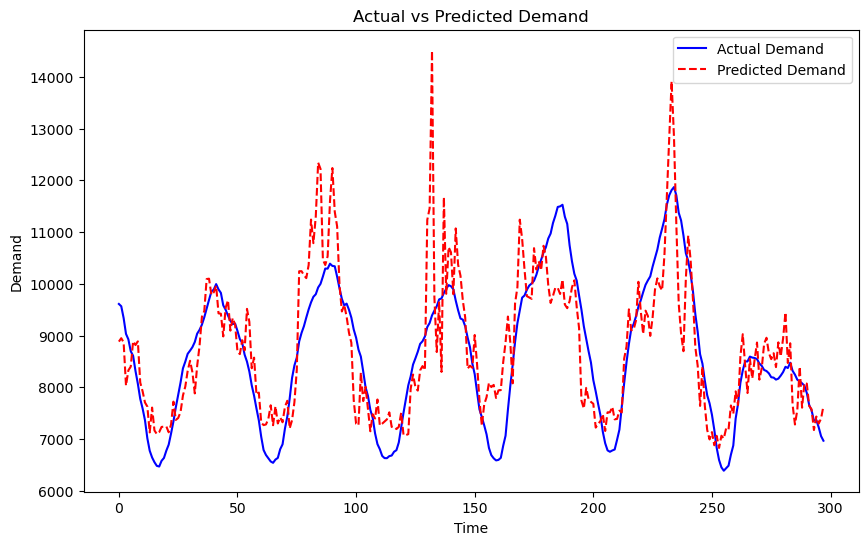

In [12]:
# Plot actual vs predicted demand
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Demand', color='blue')
plt.plot(y_pred, label='Predicted Demand', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand')
plt.show()


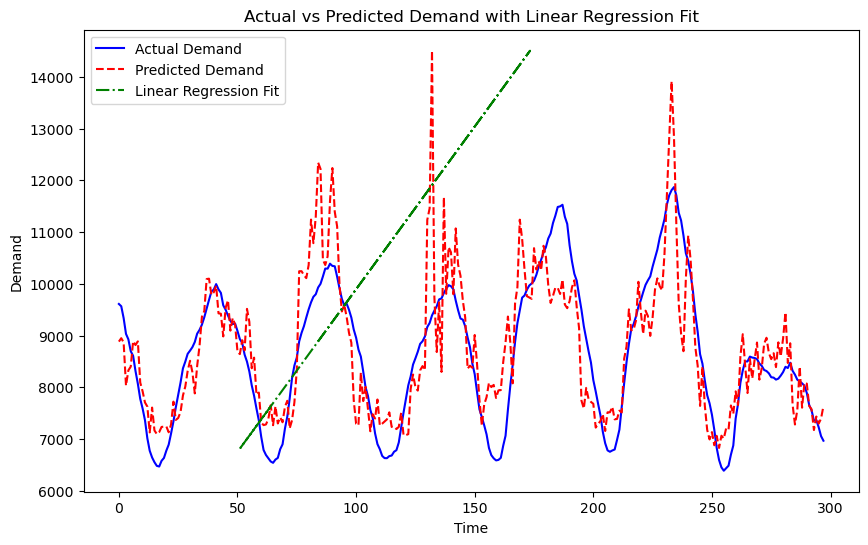

In [13]:
# Plot actual vs predicted demand
plt.figure(figsize=(10, 6))

# Plot actual demand
plt.plot(y_test.values, label='Actual Demand', color='blue')

# Plot predicted demand
plt.plot(y_pred, label='Predicted Demand', color='red', linestyle='--')

# Adding the linear regression fit (using the fitted model and independent variable 'RRP')
plt.plot(X_test.values, model.predict(X_test), label='Linear Regression Fit', color='green', linestyle='-.')

# Adding labels and title
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand with Linear Regression Fit')

# Show the plot
plt.show()


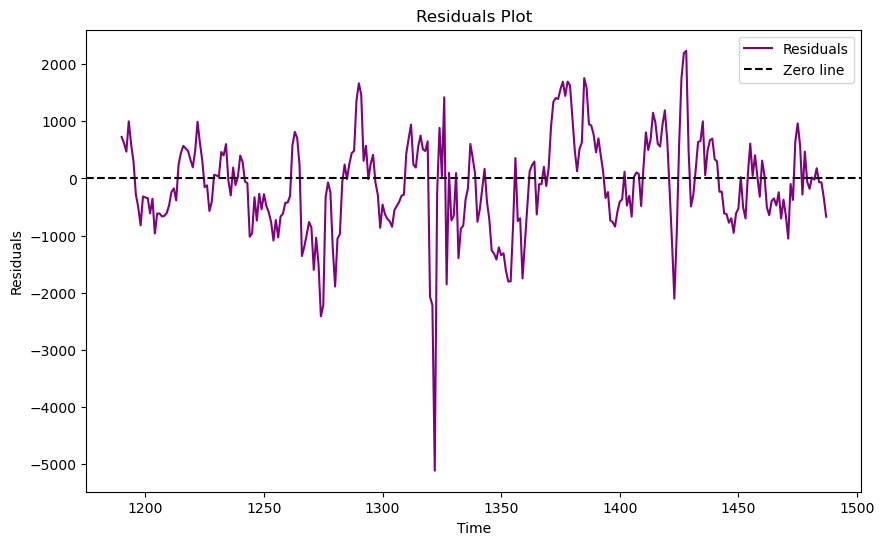

In [14]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


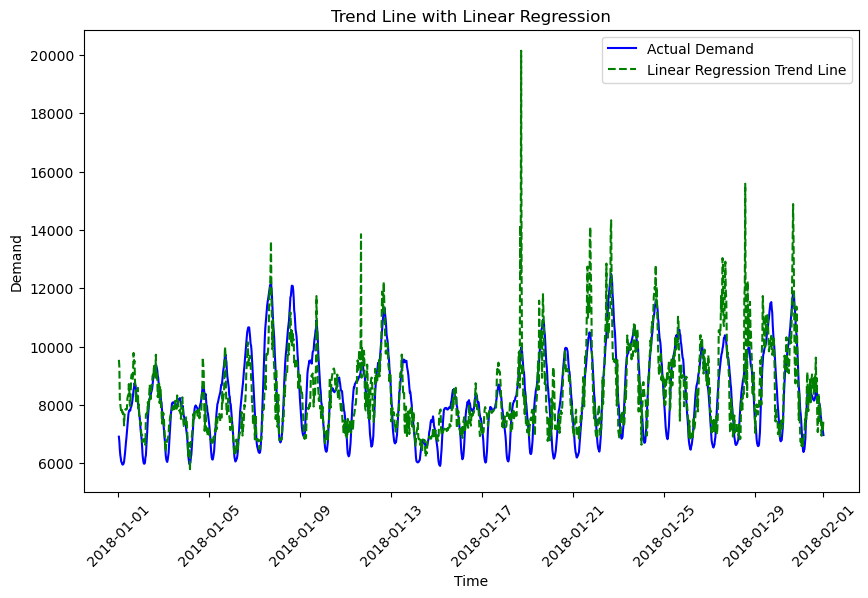

In [20]:
# Plot actual demand with the linear regression trend line
plt.figure(figsize=(10, 6))

# Plot actual demand
plt.plot(data['SETTLEMENTDATE'], y, label='Actual Demand', color='blue')

# Plot the fitted linear regression line using the entire dataset
plt.plot(data['SETTLEMENTDATE'], model.predict(X), label='Linear Regression Trend Line', color='green', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Trend Line with Linear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()
